In [1]:
%matplotlib inline
import numpy as np
import theano.tensor as tt
import pymc3 as pm
from scipy import stats
from pymc3 import Continuous
from theano import tensor 
from pymc3 import Model, Normal, Slice
from pymc3 import sample
from pymc3 import traceplot
from pymc3.distributions import Interpolated
from theano import as_op
import theano.tensor as tt
import numpy as np
from scipy import stats
import threading
from multiprocessing.pool import ThreadPool
from astropy.table import Table, vstack
import pandas as pd
import os
#exp, log, sqrt
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from astropy.table import Column
import astropy

import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('notebook')
plt.style.use('seaborn-darkgrid')
print('Running on PyMC3 v{}'.format(pm.__version__))
core_count = 20

Running on PyMC3 v3.8


In [2]:
import glob
filelist = np.asarray(glob.glob(r"C:\Users\20xha\Documents\SIRWork\LC_Supernova_Data\lc_graphs/*/*.csv"))

In [3]:
len(filelist)

127

In [4]:
Results = Table.read(filelist[0])
for i in filelist[1::]:
    Results = vstack([Results, Table.read(i)])

In [5]:
Results_Green = Results[np.where(Results["filter"] == "bg")]
Results_Red = Results[np.where(Results["filter"] == "br")]

In [6]:
r_hat = ["Amplitude_r_hat","gamma_r_hat","trise_r_hat","tfall_r_hat","Beta_r_hat","t0_r_hat","scalar_r_hat"]

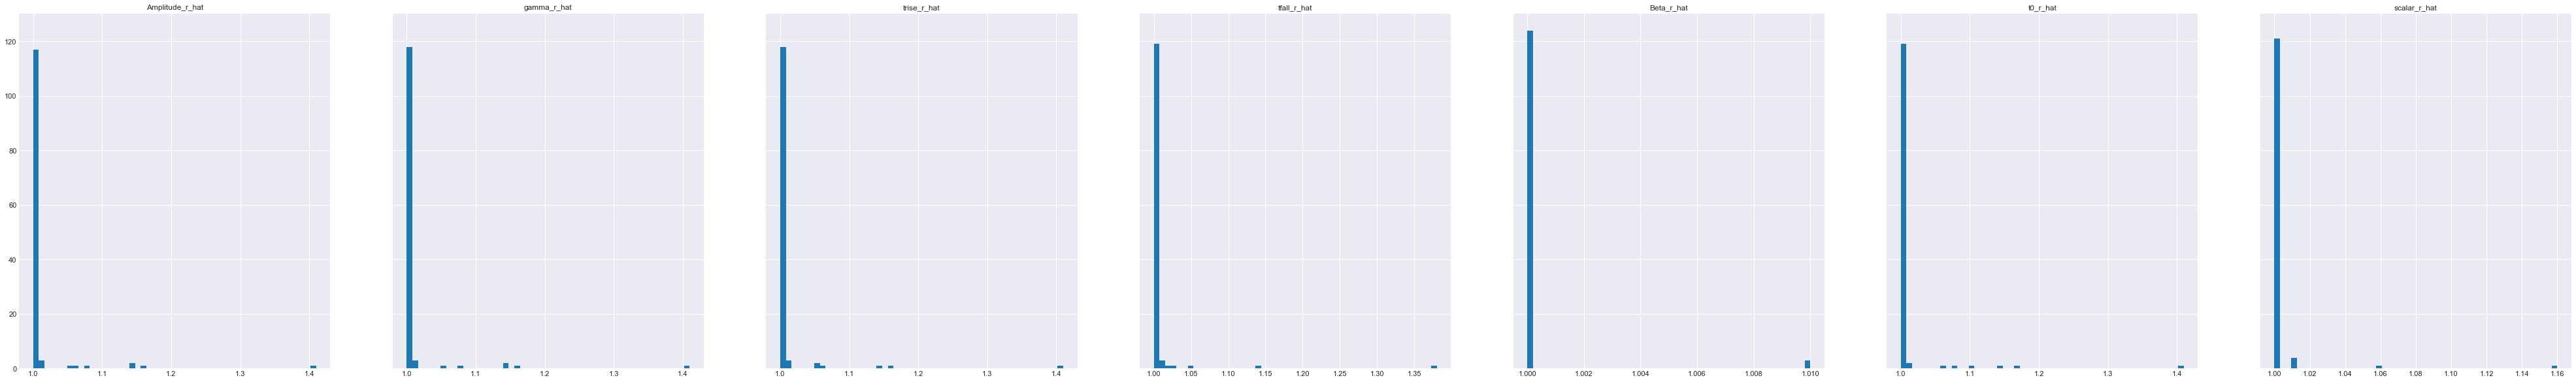

In [7]:
fig, axes = plt.subplots(1, 7, sharey = True, figsize=(70, 10))
for i in range(7):
    axes[i].set_title(r_hat[i])
    axes[i].hist(Results_Green[r_hat[i]], bins = 50)

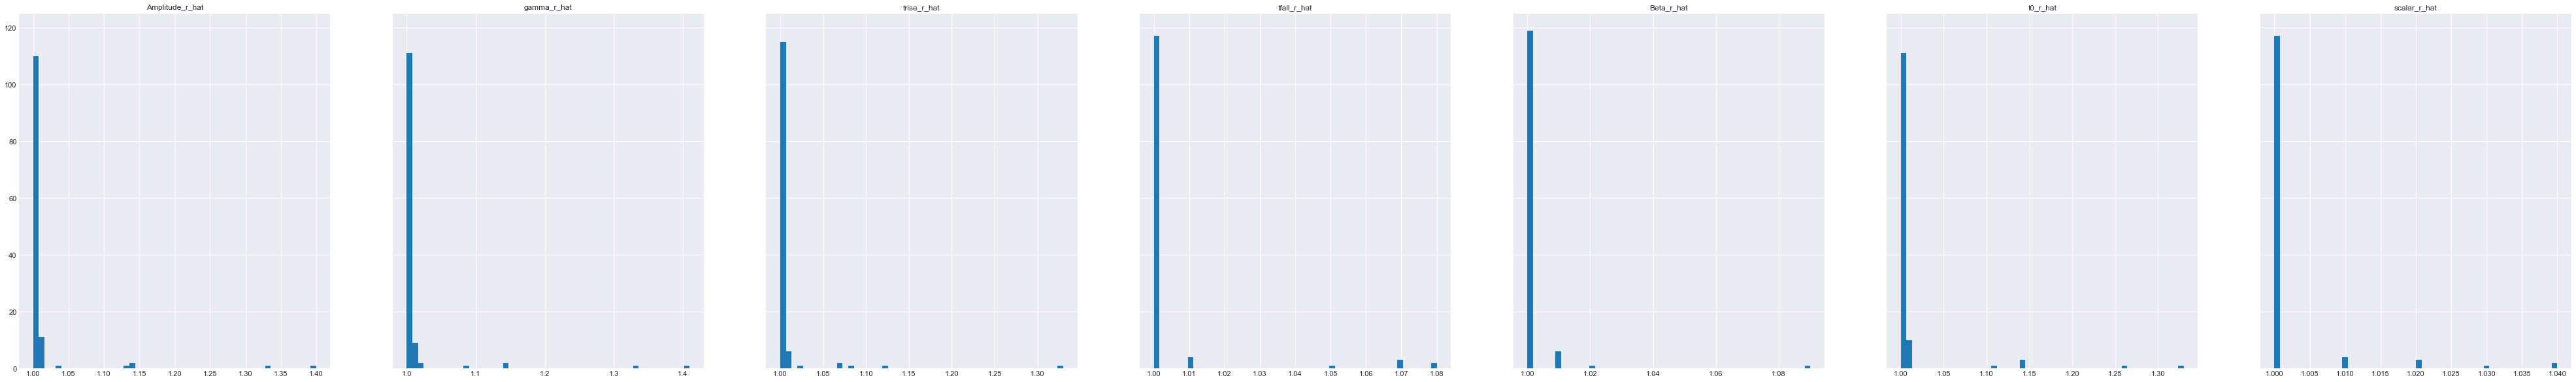

In [8]:
fig, axes = plt.subplots(1, 7, sharey = True, figsize=(70, 10))
for i in range(7):
    axes[i].set_title(r_hat[i])
    axes[i].hist(Results_Red[r_hat[i]], bins = 50)

In [9]:
Results_Green[np.argmax(Results_Green["Amplitude_r_hat"])]

filename,filter,Amplitude_MAP,Amplitude_mean,Amplitude_sd,Amplitude_hpd_3%,Amplitude_hpd_97%,Amplitude_mcse_mean,Amplitude_mcse_sd,Amplitude_ess_mean,Amplitude_ess_sd,Amplitude_ess_bulk,Amplitude_ess_tail,Amplitude_r_hat,trise_MAP,trise_mean,trise_sd,trise_hpd_3%,trise_hpd_97%,trise_mcse_mean,trise_mcse_sd,trise_ess_mean,trise_ess_sd,trise_ess_bulk,trise_ess_tail,trise_r_hat,tfall_MAP,tfall_mean,tfall_sd,tfall_hpd_3%,tfall_hpd_97%,tfall_mcse_mean,tfall_mcse_sd,tfall_ess_mean,tfall_ess_sd,tfall_ess_bulk,tfall_ess_tail,tfall_r_hat,Beta_MAP,Beta_mean,Beta_sd,Beta_hpd_3%,Beta_hpd_97%,Beta_mcse_mean,Beta_mcse_sd,Beta_ess_mean,Beta_ess_sd,Beta_ess_bulk,Beta_ess_tail,Beta_r_hat,t0_MAP,t0_mean,t0_sd,t0_hpd_3%,t0_hpd_97%,t0_mcse_mean,t0_mcse_sd,t0_ess_mean,t0_ess_sd,t0_ess_bulk,t0_ess_tail,t0_r_hat,gamma_MAP,gamma_mean,gamma_sd,gamma_hpd_3%,gamma_hpd_97%,gamma_mcse_mean,gamma_mcse_sd,gamma_ess_mean,gamma_ess_sd,gamma_ess_bulk,gamma_ess_tail,gamma_r_hat,scalar_MAP,scalar_mean,scalar_sd,scalar_hpd_3%,scalar_hpd_97%,scalar_mcse_mean,scalar_mcse_sd,scalar_ess_mean,scalar_ess_sd,scalar_ess_bulk,scalar_ess_tail,scalar_r_hat
str26,str2,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ZTF18abfhaji_force_phot.h5,bg,129.71176147460938,136.50599670410156,13.505000114440918,123.62100219726562,165.69200134277344,2.9260001182556152,2.1050000190734863,21.0,21.0,41.0,100.0,1.409999966621399,2.8266382217407227,2.990999937057495,0.4359999895095825,2.4210000038146973,3.9590001106262207,0.0860000029206276,0.06199999898672104,26.0,25.0,41.0,100.0,1.409999966621399,13.40965747833252,13.835000038146973,0.9150000214576721,12.446999549865723,15.807000160217285,0.164000004529953,0.11800000071525574,31.0,31.0,43.0,102.0,1.3799999952316284,-0.39678528904914856,-0.4320000112056732,0.23199999332427979,-0.8180000185966492,-0.06199999898672104,0.0020000000949949026,0.0010000000474974513,21830.0,21830.0,20615.0,59675.0,1.0,89.51376342773438,89.83999633789062,0.8399999737739563,88.96399688720703,91.72100067138672,0.1770000010728836,0.12700000405311584,22.0,22.0,41.0,110.0,1.409999966621399,12.407859802246094,11.128999710083008,2.7639999389648438,5.547999858856201,13.22700023651123,0.6100000143051147,0.43700000643730164,21.0,21.0,41.0,100.0,1.409999966621399,0.8305866122245789,0.6740000247955322,0.6610000133514404,-0.6110000014305115,1.8949999809265137,0.07699999958276749,0.054999999701976776,74.0,74.0,82.0,134.0,1.159999966621399


In [10]:
MAP = ["Amplitude_MAP","gamma_MAP","trise_MAP","tfall_MAP","Beta_MAP","t0_MAP","scalar_MAP"]

In [11]:
sns.set()

In [12]:
MAP_Filter = ["filter","Amplitude_MAP","gamma_MAP","trise_MAP","tfall_MAP","Beta_MAP","t0_MAP","scalar_MAP"]

In [13]:
print(MAP_Filter)

['filter', 'Amplitude_MAP', 'gamma_MAP', 'trise_MAP', 'tfall_MAP', 'Beta_MAP', 't0_MAP', 'scalar_MAP']


In [14]:
pandas_map_results = Results[MAP_Filter].to_pandas()

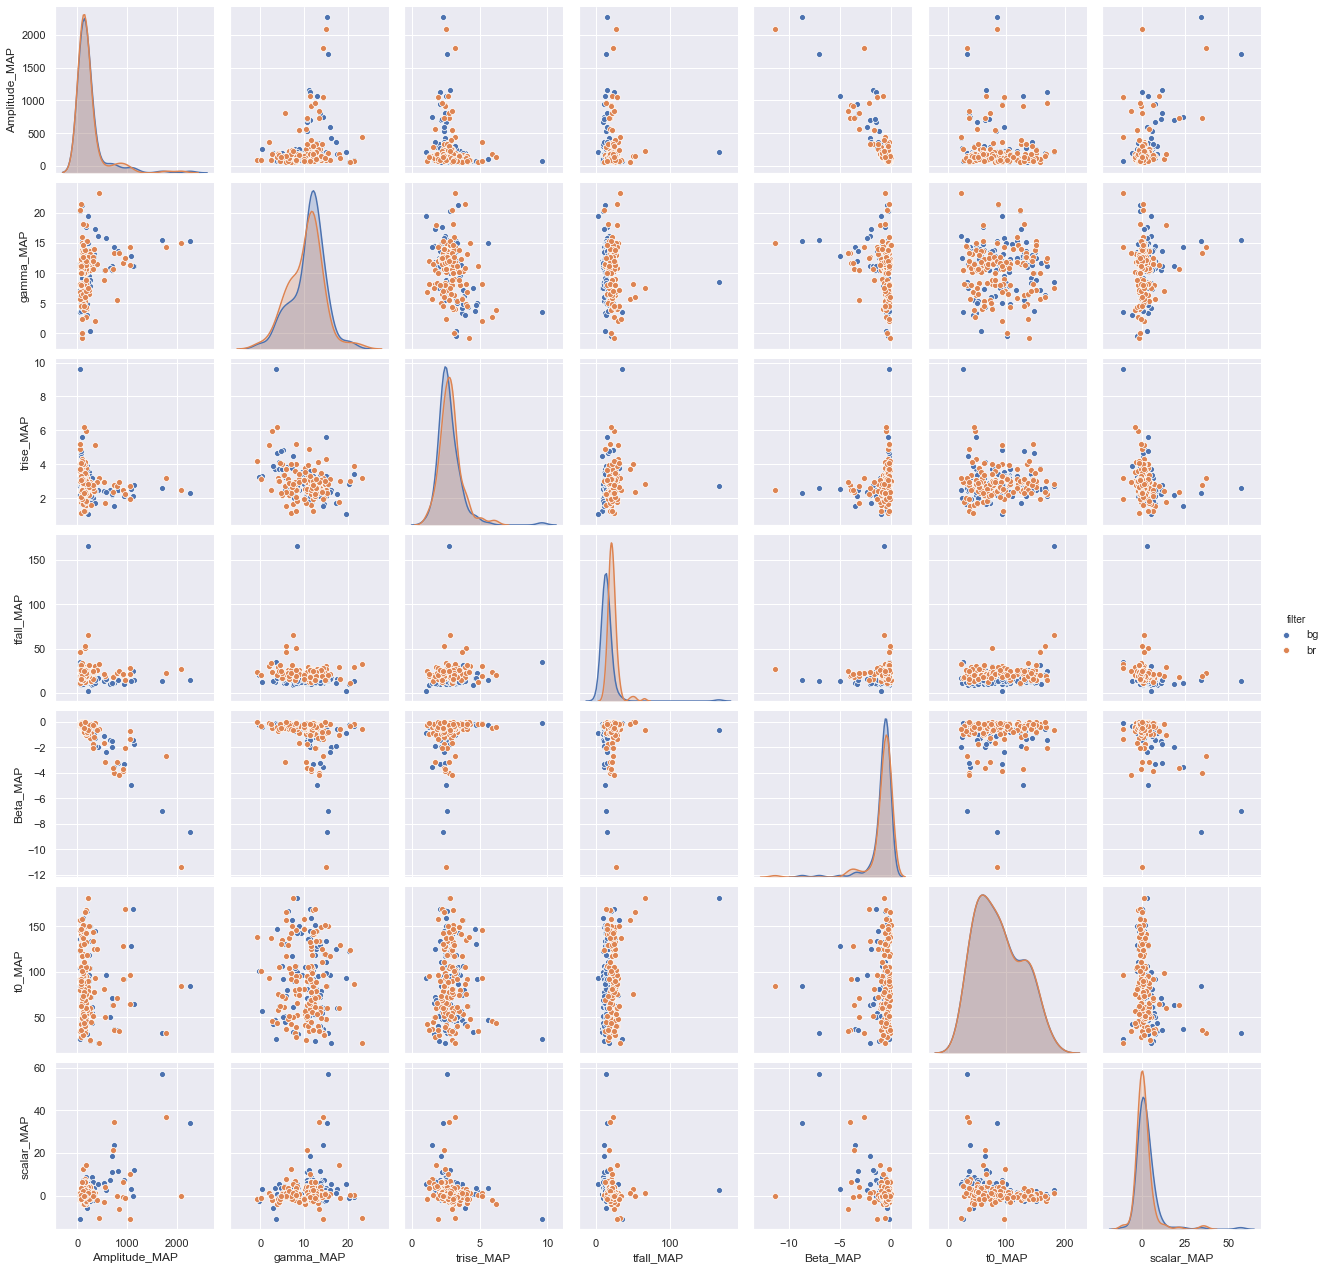

In [15]:
sns.pairplot(data=pandas_map_results, hue='filter');

In [16]:
Results_Green[np.argmax(Results_Green["tfall_MAP"])]

filename,filter,Amplitude_MAP,Amplitude_mean,Amplitude_sd,Amplitude_hpd_3%,Amplitude_hpd_97%,Amplitude_mcse_mean,Amplitude_mcse_sd,Amplitude_ess_mean,Amplitude_ess_sd,Amplitude_ess_bulk,Amplitude_ess_tail,Amplitude_r_hat,trise_MAP,trise_mean,trise_sd,trise_hpd_3%,trise_hpd_97%,trise_mcse_mean,trise_mcse_sd,trise_ess_mean,trise_ess_sd,trise_ess_bulk,trise_ess_tail,trise_r_hat,tfall_MAP,tfall_mean,tfall_sd,tfall_hpd_3%,tfall_hpd_97%,tfall_mcse_mean,tfall_mcse_sd,tfall_ess_mean,tfall_ess_sd,tfall_ess_bulk,tfall_ess_tail,tfall_r_hat,Beta_MAP,Beta_mean,Beta_sd,Beta_hpd_3%,Beta_hpd_97%,Beta_mcse_mean,Beta_mcse_sd,Beta_ess_mean,Beta_ess_sd,Beta_ess_bulk,Beta_ess_tail,Beta_r_hat,t0_MAP,t0_mean,t0_sd,t0_hpd_3%,t0_hpd_97%,t0_mcse_mean,t0_mcse_sd,t0_ess_mean,t0_ess_sd,t0_ess_bulk,t0_ess_tail,t0_r_hat,gamma_MAP,gamma_mean,gamma_sd,gamma_hpd_3%,gamma_hpd_97%,gamma_mcse_mean,gamma_mcse_sd,gamma_ess_mean,gamma_ess_sd,gamma_ess_bulk,gamma_ess_tail,gamma_r_hat,scalar_MAP,scalar_mean,scalar_sd,scalar_hpd_3%,scalar_hpd_97%,scalar_mcse_mean,scalar_mcse_sd,scalar_ess_mean,scalar_ess_sd,scalar_ess_bulk,scalar_ess_tail,scalar_r_hat
str26,str2,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ZTF18abwmuua_force_phot.h5,bg,214.54530334472656,218.63999938964844,11.071000099182129,198.21099853515625,239.1060028076172,0.09099999815225601,0.06700000166893005,14897.0,13586.0,20718.0,11758.0,1.0,2.7418956756591797,2.7950000762939453,0.34200000762939453,2.1600000858306885,3.443000078201294,0.0020000000949949026,0.0010000000474974513,37267.0,36493.0,37925.0,45161.0,1.0,166.40179443359375,172.16000366210938,77.98400115966797,45.970001220703125,299.99798583984375,0.44999998807907104,0.3179999887943268,30034.0,30034.0,26931.0,16370.0,1.0,-0.675016462802887,-0.6859999895095825,0.4050000011920929,-1.315000057220459,-0.0,0.0020000000949949026,0.0010000000474974513,61712.0,61712.0,56879.0,49032.0,1.0,181.0366973876953,181.17999267578125,0.421999990940094,180.39300537109375,181.98599243164062,0.0020000000949949026,0.0020000000949949026,29141.0,29092.0,32044.0,19542.0,1.0,8.463798522949219,8.121000289916992,11.527999877929688,-5.265999794006348,16.263999938964844,0.23399999737739563,0.16500000655651093,2437.0,2437.0,7808.0,2169.0,1.0,2.8065621852874756,2.940000057220459,1.565000057220459,-0.07199999690055847,5.8429999351501465,0.006000000052154064,0.004000000189989805,61618.0,60542.0,61565.0,59813.0,1.0


In [17]:
Results_Green[np.argmax(Results_Green["trise_MAP"])]

filename,filter,Amplitude_MAP,Amplitude_mean,Amplitude_sd,Amplitude_hpd_3%,Amplitude_hpd_97%,Amplitude_mcse_mean,Amplitude_mcse_sd,Amplitude_ess_mean,Amplitude_ess_sd,Amplitude_ess_bulk,Amplitude_ess_tail,Amplitude_r_hat,trise_MAP,trise_mean,trise_sd,trise_hpd_3%,trise_hpd_97%,trise_mcse_mean,trise_mcse_sd,trise_ess_mean,trise_ess_sd,trise_ess_bulk,trise_ess_tail,trise_r_hat,tfall_MAP,tfall_mean,tfall_sd,tfall_hpd_3%,tfall_hpd_97%,tfall_mcse_mean,tfall_mcse_sd,tfall_ess_mean,tfall_ess_sd,tfall_ess_bulk,tfall_ess_tail,tfall_r_hat,Beta_MAP,Beta_mean,Beta_sd,Beta_hpd_3%,Beta_hpd_97%,Beta_mcse_mean,Beta_mcse_sd,Beta_ess_mean,Beta_ess_sd,Beta_ess_bulk,Beta_ess_tail,Beta_r_hat,t0_MAP,t0_mean,t0_sd,t0_hpd_3%,t0_hpd_97%,t0_mcse_mean,t0_mcse_sd,t0_ess_mean,t0_ess_sd,t0_ess_bulk,t0_ess_tail,t0_r_hat,gamma_MAP,gamma_mean,gamma_sd,gamma_hpd_3%,gamma_hpd_97%,gamma_mcse_mean,gamma_mcse_sd,gamma_ess_mean,gamma_ess_sd,gamma_ess_bulk,gamma_ess_tail,gamma_r_hat,scalar_MAP,scalar_mean,scalar_sd,scalar_hpd_3%,scalar_hpd_97%,scalar_mcse_mean,scalar_mcse_sd,scalar_ess_mean,scalar_ess_sd,scalar_ess_bulk,scalar_ess_tail,scalar_r_hat
str26,str2,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ZTF18aarldnh_force_phot.h5,bg,67.52955627441406,65.81300354003906,20.270999908447266,27.305999755859375,102.96900177001953,0.3400000035762787,0.3240000009536743,3546.0,1960.0,5466.0,1885.0,1.0,9.590585708618164,21.881999969482422,15.182999610900879,0.027000000700354576,46.672000885009766,0.12099999934434891,0.08500000089406967,15795.0,15795.0,14850.0,31023.0,1.0,34.924190521240234,61.915000915527344,45.45899963378906,8.690999984741211,148.31900024414062,0.32899999618530273,0.2329999953508377,19068.0,19068.0,9404.0,3183.0,1.0,-0.12354983389377594,-0.12399999797344208,0.07199999690055847,-0.23399999737739563,-0.0,0.0,0.0,46570.0,46570.0,46877.0,35472.0,1.0,25.939802169799805,26.257999420166016,0.8349999785423279,24.64699935913086,27.80299949645996,0.004000000189989805,0.003000000026077032,36109.0,35468.0,35064.0,40985.0,1.0,3.6086721420288086,4.34499979019165,3.7119998931884766,-2.5810000896453857,11.35099983215332,0.024000000208616257,0.017000000923871994,24141.0,24141.0,23227.0,18590.0,1.0,-10.870546340942383,-12.741000175476074,7.991000175476074,-29.402999877929688,0.6019999980926514,0.05400000140070915,0.03999999910593033,21989.0,19643.0,23276.0,24736.0,1.0


In [18]:
Results_Red[np.argmin(Results_Red["Beta_MAP"])]["Beta_MAP"]

-11.350983619689941

In [19]:
SN_info_files = Table.read(r"C:\Users\20xha\Documents\SIRWork\LC_Supernova_Data/Nobs_cut_salt2_spec_subtype_pec.csv")

In [20]:
z_adopt = SN_info_files["name", "z_adopt"]
cosmo = FlatLambdaCDM(H0=72 * u.km / u.s / u.Mpc, Om0=0.3)

In [21]:
norm_factor = ((cosmo.luminosity_distance(z_adopt["z_adopt"]))**2/(10*u.pc)**2)/1e6

In [22]:
norm_factor_column = Column(norm_factor, name = "norm_factor")

In [23]:
z_adopt.add_column(norm_factor, name = "norm_factor")

In [24]:
norm_factor

<Quantity [1.24731696e-03, 6.74587452e-04, 1.75648290e-03, 5.90936641e-04,
           9.98968207e-04, 1.03463372e-03, 2.82721536e-03, 9.88824405e-04,
           7.27239221e-04, 9.41797270e-04, 8.32550735e-04, 1.31407861e-03,
           2.34728312e-03, 2.80394020e-03, 5.87198765e-05, 1.44803543e-03,
           5.70282280e-04, 1.15073866e-03, 1.35089133e-03, 2.44299908e-04,
           1.50302961e-03, 9.72981474e-04, 2.08918328e-03, 7.31614489e-04,
           9.13800123e-04, 4.84646983e-04, 4.87791606e-03, 5.28558240e-04,
           2.80394020e-03, 1.30905724e-04, 2.10822629e-04, 2.01703255e-03,
           2.65153330e-03, 1.80644589e-04, 1.65973480e-03, 1.38275613e-03,
           1.15073866e-03, 4.17660453e-04, 1.87674507e-03, 1.07652981e-03,
           1.02855328e-03, 8.14702874e-04, 1.40015625e-03, 6.68733084e-04,
           1.00319926e-03, 6.82246315e-04, 4.33101156e-03, 1.05051774e-04,
           7.85761936e-04, 8.52238299e-04, 4.86623166e-04, 1.21465057e-03,
           1.34683312e-04

In [25]:
z_adopt

name,z_adopt,norm_factor
,,Mpc2 / pc2
str12,float64,float64
ZTF18aailmnv,0.08,0.0012473169588955871
ZTF18aansqun,0.059676,0.0006745874515841708
ZTF18aaoxryq,0.094029,0.0017564829031112776
ZTF18aapqwyv,0.055999999999999994,0.0005909366414428644
ZTF18aapsedq,0.071993,0.0009989682071962292
ZTF18aaqcozd,0.07320499999999999,0.0010346337162608866
ZTF18aaqcqkv,0.11745,0.002827215355073688
ZTF18aaqcqvr,0.071644,0.0009888244045771512


In [26]:
name = []
for i in Results["filename"]:
    name.append(i.split("_")[0])

In [27]:
name_column = Column(name, name = "name")

In [28]:
Results.add_column(name_column, name = "name")

In [29]:
Results_Joined = astropy.table.join(Results, z_adopt)

In [30]:
normalized_amp = Results_Joined["norm_factor"] * Results_Joined["Amplitude_MAP"]

In [31]:
normalized_amp_column = Column(normalized_amp, name = "Amplitude_norm")

In [32]:
Results_Joined.add_column(normalized_amp_column, name = "Amplitude_norm")

In [33]:
Normal_MAP = ["Amplitude_norm","gamma_MAP","trise_MAP","tfall_MAP","Beta_MAP","t0_MAP","scalar_MAP","filter"]

In [34]:
pandas_map_results_joined = Results_Joined[Normal_MAP].to_pandas()

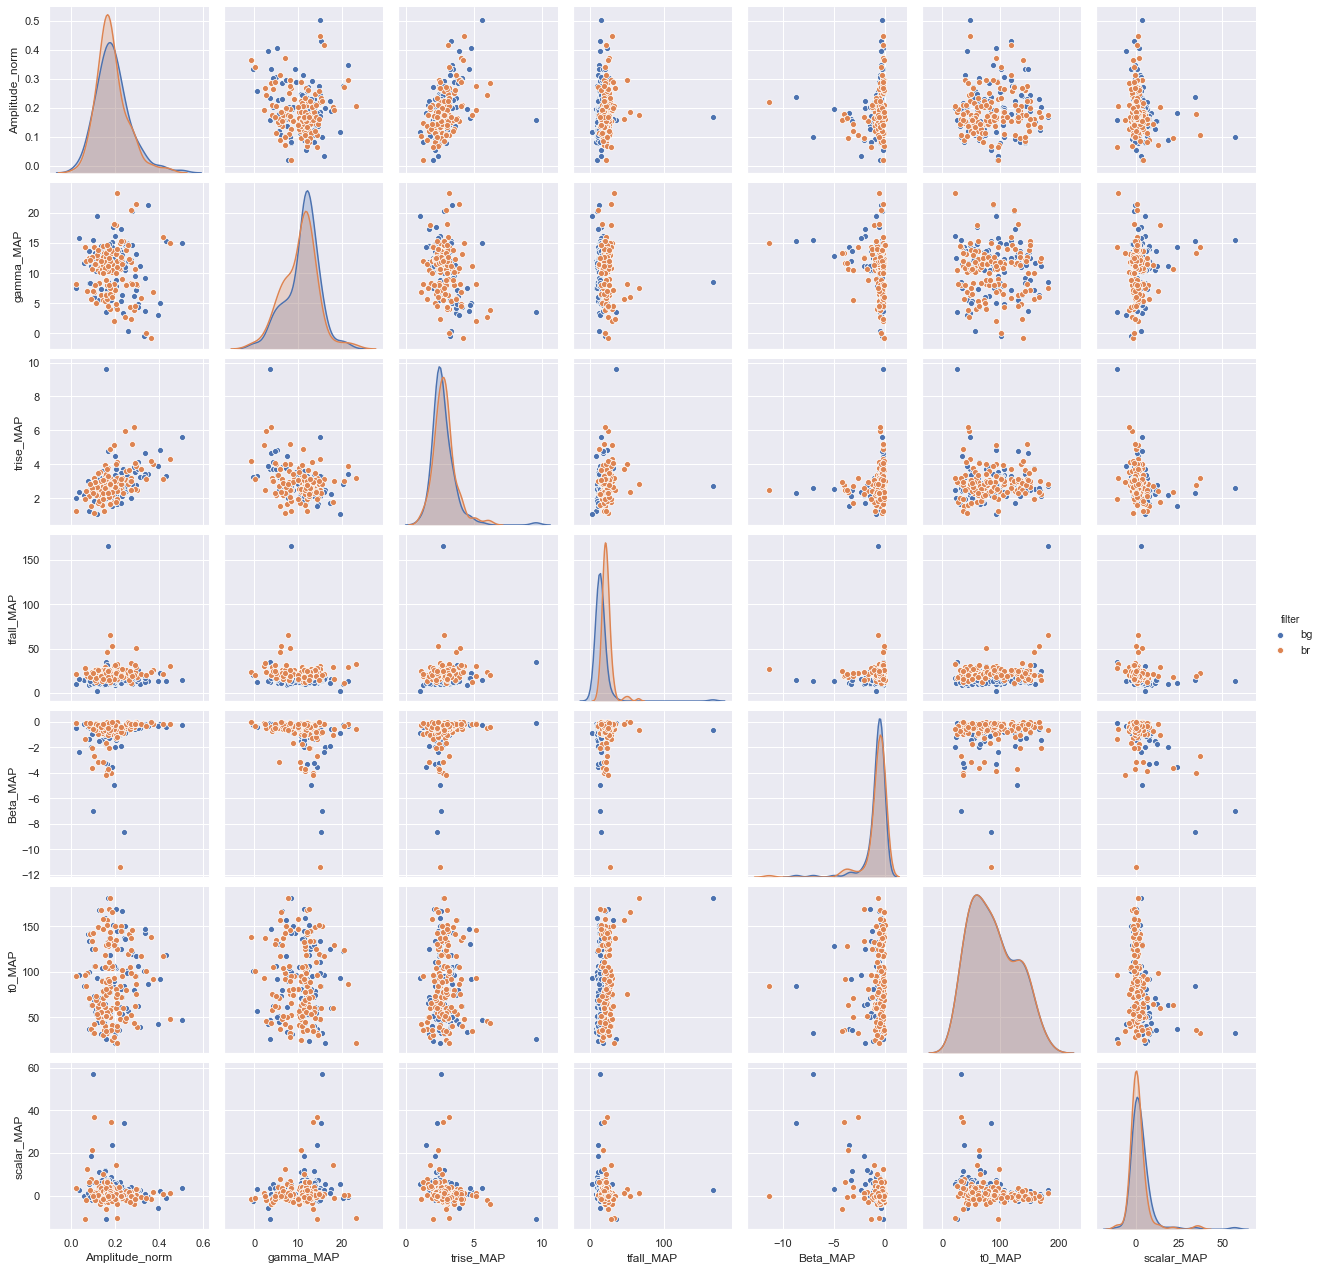

In [35]:
sns.pairplot(data=pandas_map_results_joined, hue='filter');

In [36]:
namesList = np.unique(Results["name"])

In [37]:
for i in SN_info_files["name"]:
    if not(i in namesList):
        print(i)

In [41]:
Results_Joined[np.where(Results_Joined["name"] == "ZTF18abclfee")]["Amplitude_norm"]

0.02026451696174179
0.02229422536444803


In [42]:
Results_Joined[np.where(Results_Joined["name"] == "ZTF18abclfee")]["Amplitude_MAP"]

133.00067138671875
146.32211303710938


In [48]:
np.sort(Results_Joined["Amplitude_norm"])

0.02026451696174179
0.02229422536444803
0.03607711700044414
0.056494449456259255
0.06467862999810685
0.06823179068449652
0.07333210067197711
0.07790239977287072
0.08016534546200471
0.08105838127766772
0.08128725045217088


In [44]:
np.median(Results_Joined["Amplitude_norm"])

C:\ProgramData\Anaconda3\envs\Astronomy\lib\site-packages\numpy\core\fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


0.17591535568640942